# Ejercicio Regresión Lineal


¡Felicidades! Acaba de obtener un contrato de trabajo con una empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y pedir ya sea en una aplicación móvil o en un sitio web la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en su experiencia de aplicación móvil o en su sitio web. ¡Te han contratado para ayudarles a resolverlo! ¡Empecemos!

Simplemente siga los pasos a continuación para analizar los datos del cliente (es falso, no se preocupe, no le di números de tarjeta de crédito o correos electrónicos reales).

## Importar las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar los datos

Trabajaremos con el archivo csv "Ecommerce Customers" de la compañía. Tiene información del cliente, como correo electrónico, dirección y color de su Avatar. Luego también tiene columnas de valor numérico:

* Avg. Session Length: sesión promedio de sesiones de asesoramiento de estilo en la tienda.
* Time on App: tiempo promedio empleado en la aplicación en minutos
* Time on Website: tiempo promedio de permanencia en el sitio web en minutos
* Length of Membership: cuántos años ha sido miembro el cliente.

** Lea el archivo csv de "Ecommerce Customers" como un DataFrame llamado customers. **

In [3]:
customers = pd.read_csv("Ecommerce Customers")

**Verifique el head of customers, info() and describe()**

In [4]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [5]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## EDA

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

**¡Vamos a explorar los datos!**

Para el resto del ejercicio, solo utilizaremos los datos numéricos del archivo csv.
___
**Use seaborn para crear un gráfico joinplot para comparar las columnas "Time on Website" y "Yearly Amount Spent". ¿Tiene sentido la correlación?**

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

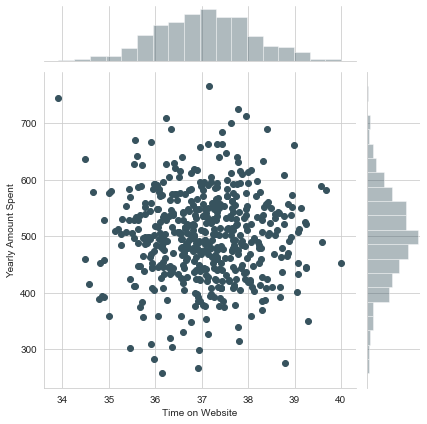

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**Lo mismo pero ahora con la columna "Time on App"**

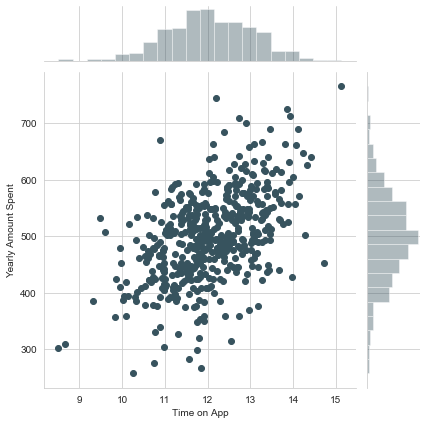

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Exploremos las relaciones que existen en todo el conjunto de datos. Use [pairplot] (https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el diagrama siguiente**

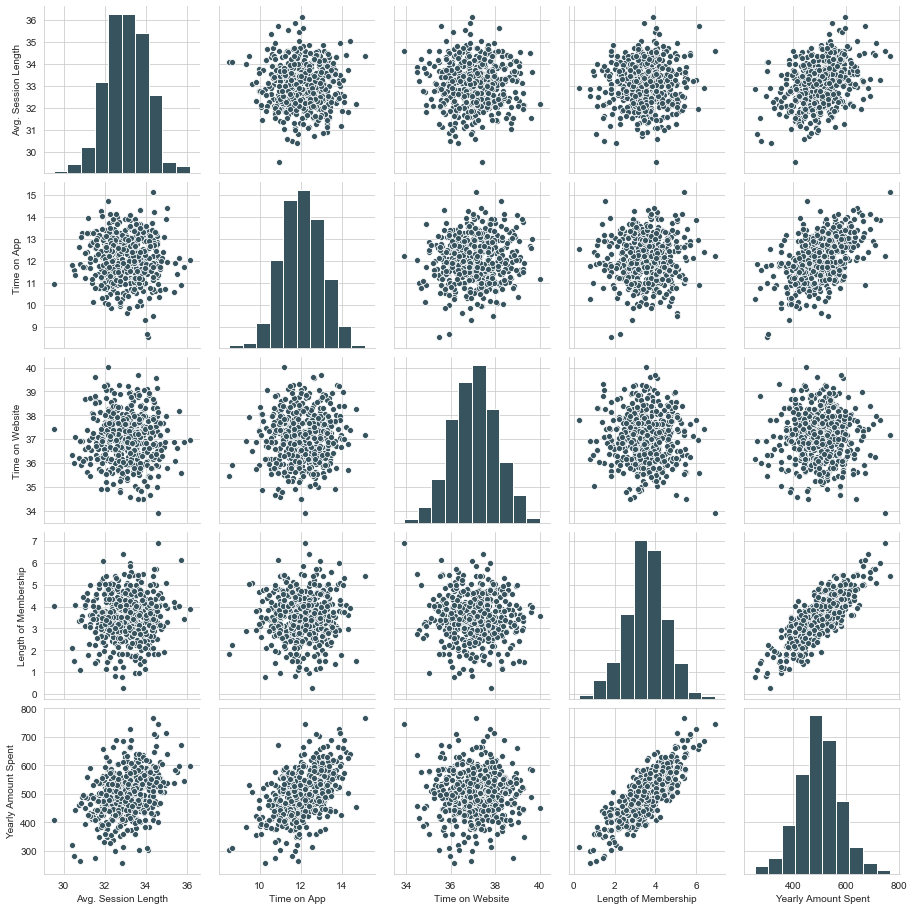

In [10]:
sns.pairplot(customers)

**Basado en esta gráfica, ¿cuál parece ser la característica más correlacionada con la Cantidad anual gastada?**

In [11]:
# Length of Membership 

**Cree un gráfico lineal (usando lmplot de seaborn) de la "Yearly Amount Spent vs. Length of Membership.**

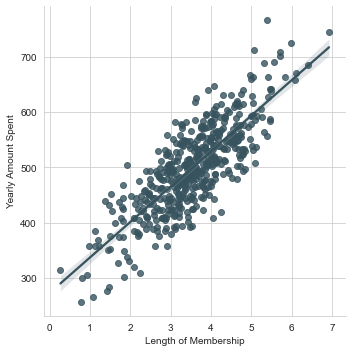

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Dividir el data set en conjunto de entrenamiento y conjunto de testing


**Establezca una variable "X" igual a las características numéricas de los clientes y una variable "y" igual a la columna "Yearly Amount Spent".**

In [13]:
y = customers['Yearly Amount Spent']

In [14]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Use model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Establezca test_size = 0.3 y random_state = 101 **

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Entrenando el modelo

Ahora entrenemos el modelo con nuestros datos de entrenamiento!

**Importe la libreria LinearRegression de sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

**Cree una instancia de LinearRegression() llamada "lm".**

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

**Imprima los coeficientes resultantes del modelo**

In [20]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicción

**Use lm.predict() para predecir los valores con los datos de prueba (X_test) del conjunto de datos.**

In [21]:
predictions = lm.predict( X_test)

**Cree un gráfico de los valores reales contra los de la predicción**

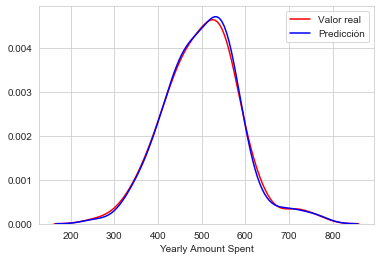

In [22]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Valor real")
sns.distplot(predictions, hist=False, color="b", label="Predicción" , ax=ax1)

Text(0, 0.5, 'Predicted Y')

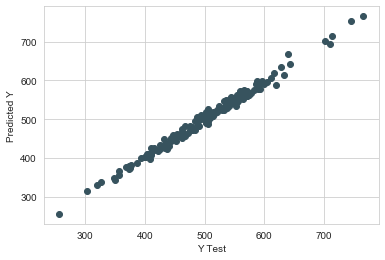

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluando el modelo


Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

**Calcule el error absoluto medio, el error cuadrático medio y la raiz del error cuadrático medio. Consulte la conferencia o Wikipedia para las fórmulas**

In [24]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430835
MSE: 79.81305165097467
RMSE: 8.933815066978646


## Resultados

Deberías haber conseguido un muy buen modelo con un buen ajuste. Exploremos rápidamente los resultados para asegurarnos de que todo esté bien con nuestros datos.

**Trace un histograma de los residuos y asegúrese de que se ve normalmente distribuido. Use cualquiera seaborn distplot o simplemente plt.hist ().**

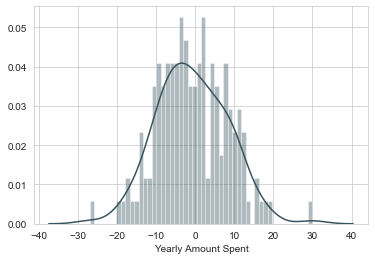

In [25]:
sns.distplot((y_test-predictions),bins=50);

In [26]:
print(lm.score(X_test, predictions))

1.0


## Conclusiones
Todavía queremos encontrar la respuesta a la pregunta original, ¿enfocamos nuestro esfuerzo en el desarrollo de aplicaciones móviles o sitios web? O tal vez eso ni siquiera importa, y el tiempo de membresía es lo realmente importante. Veamos si podemos interpretar los coeficientes para tener una idea.

**Recree el dataframe de abajo.**

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

** ¿Como podemos interpretar los resultados de abajo? **

## Interpretando los coeficientes:

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Avg. Session Length** está asociado con un aumento de **$25.98 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Time on App** está asociado con un aumento de **$38.59 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Time on Website** está asociado con un aumento de **$0.19 dolares gastados**.  

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Length of Membership** está asociado con un aumento de **$61.27 dolares gastados**.   

¿Esto tiene sentido?

**¿Dónde crees que la empresa debe enfocarce en mobile app or on their website?**

Esto es complicado, hay dos formas de pensar en esto: Desarrolle el sitio web para ponerse al día con el rendimiento de la aplicación móvil, o desarrolle más la aplicación, ya que eso es lo que funciona mejor. Este tipo de respuesta realmente depende de los otros factores que suceden en la empresa, ¡probablemente desee explorar la relación entre la duración de la membresía y la aplicación o el sitio web antes de llegar a una conclusión!



## !Buen trabajo¡